In [1]:
from indicators import bollinger  
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from dateutil import parser
import sys
sys.path.append("../")
import exploration.plotting as plotting

In [2]:
df = pd.read_pickle('../data/EUR_USD.pkl')
df_an  = df.copy()

In [3]:
df_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype                  
---  ------  --------------  -----                  
 0   time    400 non-null    datetime64[ns, tzutc()]
 1   mid_o   400 non-null    float64                
 2   mid_h   400 non-null    float64                
 3   mid_l   400 non-null    float64                
 4   mid_c   400 non-null    float64                
dtypes: datetime64[ns, tzutc()](1), float64(4)
memory usage: 15.8 KB


In [4]:
df_an = bollinger.Bollinger(df_an) 

In [5]:
df_an

,time,mid_o,mid_h,mid_l,mid_c,BOL_UP,BOL_LW,BOL_MN
0,2024-08-28 07:21:15+00:00,1.11564,1.11568,1.11564,1.11568,NaN,NaN,NaN
1,2024-08-28 07:21:20+00:00,1.11567,1.11568,1.11567,1.11568,NaN,NaN,NaN
2,2024-08-28 07:21:25+00:00,1.11566,1.11568,1.11566,1.11566,NaN,NaN,NaN
3,2024-08-28 07:21:30+00:00,1.11568,1.11569,1.11563,1.11566,NaN,NaN,NaN
4,2024-08-28 07:21:35+00:00,1.11566,1.11566,1.11564,1.11566,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
395,2024-08-28 07:55:50+00:00,1.11541,1.11542,1.11540,1.11541,1.115444,1.115376,1.115382
396,2024-08-28 07:55:55+00:00,1.11542,1.11542,1.11540,1.11541,1.115445,1.115375,1.115382
397,2024-08-28 07:56:00+00:00,1.11542,1.11542,1.11540,1.11542,1.115451,1.115376,1.115384
398,2024-08-28 07:56:05+00:00,1.11542,1.11544,1.11542,1.11544,1.115477,1.115390,1.115386


In [6]:
# graph = go.Figure()
# df_an['x_time'] = [dt.datetime.strftime(parser.parse(x), "s%y-%m-%d %H:%M") for x in df_an.time] 
# graph.add_trace(go.Candlestick(x=df_an.time, open=df_an.open, low=df_an.low, close=df_an.close,line=dict(width=1), opacity=1,
#                 increasing_fillcolor='#24A06B',
#                 decreasing_fillcolor="#CC2E3C",
#                 increasing_line_color='#2EC886',  
#                 decreasing_line_color='#FF3A4C'))
# graph.update_yaxes(
#     gridcolor="#1f292f"
#     )
# graph.update_xaxes(
#     gridcolor="#1f292f",
#     rangeslider=dict(visible=False),
#     nticks=5
# )

# graph.update_layout(
# width=900,
# height=400,
# margin=dict(l=10,r=10,b=10,t=10),
# paper_bgcolor="#2c303c",
# plot_bgcolor="#2c303c",
# font=dict(size=8, color="#e1e1e1")
# )
# graph.show()

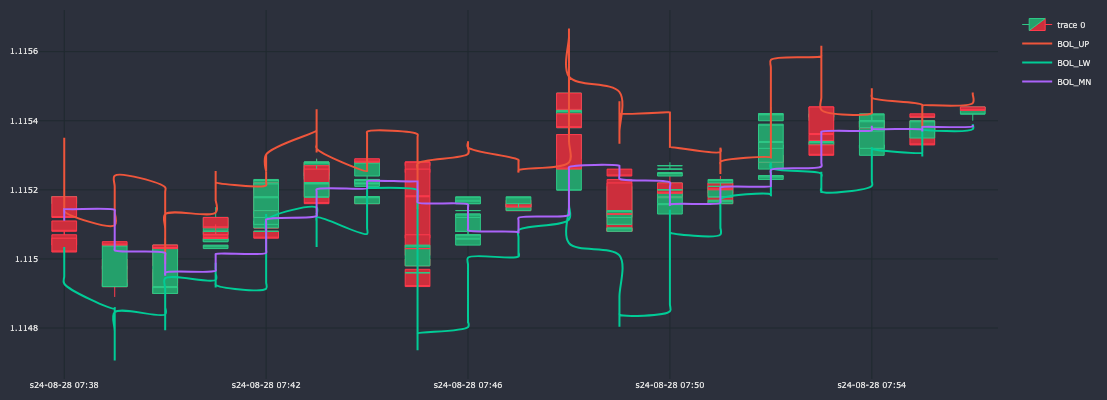

In [13]:
plot = plotting.CandlePlot(df_an.iloc[-200:],candles=True)
# plot.add_traces()
plot.show_plot(line_traces=["BOL_UP","BOL_LW","BOL_MN"])